<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Read-raw-test-data" data-toc-modified-id="Read-raw-test-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Read raw test data</a></span></li><li><span><a href="#Try-to-Unload-Pickle" data-toc-modified-id="Try-to-Unload-Pickle-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Try to Unload Pickle</a></span></li><li><span><a href="#Feature-extraction-on-natural-language-data" data-toc-modified-id="Feature-extraction-on-natural-language-data-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Feature extraction on natural language data</a></span></li><li><span><a href="#Create-additional-quantitative-features" data-toc-modified-id="Create-additional-quantitative-features-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Create additional quantitative features</a></span></li><li><span><a href="#Combine-all-quantitative-features-into-a-single-sparse-matrix" data-toc-modified-id="Combine-all-quantitative-features-into-a-single-sparse-matrix-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Combine all quantitative features into a single sparse matrix</a></span></li><li><span><a href="#Create-X,-scaled-matrix-of-features" data-toc-modified-id="Create-X,-scaled-matrix-of-features-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Create <code>X</code>, scaled matrix of features</a></span></li></ul></li><li><span><a href="#Feature-Prep---from-module" data-toc-modified-id="Feature-Prep---from-module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Prep - from module</a></span><ul class="toc-item"><li><span><a href="#create-y,-vector-of-Labels" data-toc-modified-id="create-y,-vector-of-Labels-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>create <code>y</code>, vector of Labels</a></span></li><li><span><a href="#predict-y-with-the-fit-on-the-training-set" data-toc-modified-id="predict-y-with-the-fit-on-the-training-set-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>predict <code>y</code> with the fit on the training set</a></span></li><li><span><a href="#ROC-plot-to-compare-performance-of-various-models-and-fits" data-toc-modified-id="ROC-plot-to-compare-performance-of-various-models-and-fits-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ROC plot to compare performance of various models and fits</a></span></li></ul></li><li><span><a href="#Checking-Results" data-toc-modified-id="Checking-Results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Checking Results</a></span></li></ul></div>

# Test Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
%matplotlib inline

### Read raw test data

In [2]:
amazon = pd.read_csv('../../../data/amazon_data/raw_data_test.csv')
print(amazon.shape)

(91000, 14)


In [3]:
print(amazon.head())
print(amazon['helpful'].mean())

   Unnamed: 0  Unnamed: 0.1      Id   ProductId          UserId  \
0      147718        546145  546146  B001AZ2UYI   AR4KQLKL8VJO4   
1      223621        478031  478032  B000WZZVI4  A2TIETTFZ3YYAU   
2      447075        348609  348610  B000E46GFA  A1GGO0VNCBFA0D   
3        9239        319904  319905  B0018QIPS4   A61OLW5P65ZK5   
4      424940        494951  494952  B00271OPVU  A37DKONQP3RMJO   

                       ProfileName  HelpfulnessNumerator  \
0                       W. Maxwell                    14   
1  Donna Toy "Foot comfort expert"                    10   
2                Karen M. Szymarek                     2   
3                         Khaleesi                     0   
4                    mytripletboys                     0   

   HelpfulnessDenominator  Score        Time  \
0                      15      5  1261785600   
1                      10      5  1201478400   
2                       2      5  1279929600   
3                       1      1  1338336000

### Try to Unload Pickle

In [3]:
from pipelineHelpers import CalculateQuantativeFeatures, SelectCol

In [4]:
pipeline = joblib.load('pipeline.pkl')

In [5]:
# MODEL: Naive Bayes

nbs_performance = BinaryClassificationPerformance(pipeline.predict(amazon), amazon.helpful, 'nbs')
nbs_performance.compute_measures()
print(nbs_performance.performance_measures)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


{'Pos': 6708, 'Neg': 84292, 'TP': 2702, 'TN': 72060, 'FP': 12232, 'FN': 4006, 'Accuracy': 0.82156043956043956, 'Precision': 0.18092942279362528, 'Recall': 0.4028026237328563, 'desc': 'nbs'}


### Feature extraction on natural language data

In [ ]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# corpus = amazon.Text.as_matrix()
# X_bag_of_words = vectorizer.fit_transform(corpus)
# print(X_bag_of_words.toarray())

In [4]:
# vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import HashingVectorizer
# hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
hv = joblib.load('hv.pkl')
X_hv = hv.transform(amazon.Text) #!!! not fitting and transforming -- only transforming
print(X_hv.shape)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


(91000, 131072)


In [5]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
transformer = joblib.load('transformer.pkl')
X_tfidf = transformer.transform(X_hv)

In [6]:
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


### Create additional quantitative features

In [7]:
# features from Amazon.csv to add to feature set
amazon['reviewLen'] = amazon['Text'].str.len()

X_quant_features = amazon[["Score", "reviewLen"]]
print(X_quant_features.head(10))
print(type(X_quant_features))

   Score  reviewLen
0      5        924
1      5        110
2      5        892
3      1        395
4      5        125
5      4        833
6      5        891
7      5        110
8      4        720
9      3        190
<class 'pandas.core.frame.DataFrame'>


### Combine all quantitative features into a single sparse matrix

In [8]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(91000, 131074)


### Create `X`, scaled matrix of features

In [9]:
# feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
sc = joblib.load('sc.pkl')
X = sc.transform(X_matrix)
print(X.shape)
# check to make sure has same num columns as training

(91000, 131074)


## Feature Prep - from module

In [3]:
from featuresPreparation import AmazonReviewFeaturePrep
featurePreparer = AmazonReviewFeaturePrep(amazon)

In [4]:
featurePreparer.rawData.shape

(91000, 14)

In [5]:
featurePreparer.prepare_all_features_test()

starting to prepare features


/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


1. finished applying hash vectorizor
2. finished applying tfidf


/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


3. finished applying summary text transformers
8. starting quant features
9. starting product aggregates
10. finished product aggregates
11. finished quant features
scale applied
finished preparing test features


In [6]:
X = featurePreparer.X
X.shape

(91000, 262149)

### create `y`, vector of Labels

In [10]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


### predict `y` with the fit on the training set

In [12]:
# MODEL: SVM, linear
# from sklearn import linear_model
# svm = linear_model.SGDClassifier()
# svm.fit(X, y)
# joblib.dump(svm, 'svm.pkl') # pickle
svm = joblib.load('svm.pkl') # pickle !!! important to use fit from training

svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
svm_performance.compute_measures()
print(svm_performance.performance_measures)

{'Pos': 6708, 'Neg': 84292, 'TP': 1499, 'TN': 77460, 'FP': 6832, 'FN': 5209, 'Accuracy': 0.8676813186813187, 'Precision': 0.17993038050654184, 'Recall': 0.22346451997614789, 'desc': 'svm'}


**Round2 Results** (with summary text and time column): {'Pos': 6708, 'Neg': 84292, 'TP': 2018, 'TN': 69940, 'FP': 14352, 'FN': 4690, 'Accuracy': 0.79074725274725277, 'Precision': 0.12327428222357972, 'Recall': 0.30083482409063805, 'desc': 'svm'}
Accuracy down, Precision up, Recall up

**Round1 Results**: {'Pos': 6708, 'FN': 4664, 'desc': 'svm', 'Recall': 0.30471079308288612, 'Precision': 0.28057652711050102, 'TN': 79051, 'Neg': 84292, 'Accuracy': 0.89115384615384619, 'FP': 5241, 'TP': 2044}

**Initial results**: {'FN': 4894, 'TN': 78482, 'desc': 'svm', 'Neg': 84292, 'Accuracy': 0.88237362637362637, 'FP': 5810, 'Pos': 6708, 'Precision': 0.23793284365162645, 'TP': 1814, 'Recall': 0.27042337507453784}


In [14]:
# MODEL: logistic regression
# from sklearn import linear_model
# lgs = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
# lgs.fit(X, y)
# joblib.dump(lgs, 'lgs.pkl') # pickle
lgs = joblib.load('lgs.pkl')

lgs_performance = BinaryClassificationPerformance(lgs.predict(X), y, 'lgs')
lgs_performance.compute_measures()
print(lgs_performance.performance_measures)

{'Pos': 6708, 'Neg': 84292, 'TP': 1350, 'TN': 77589, 'FP': 6703, 'FN': 5358, 'Accuracy': 0.86746153846153851, 'Precision': 0.16763938904755993, 'Recall': 0.20125223613595708, 'desc': 'lgs'}


**Round2 Results** (with summary text and time column):{'Pos': 6708, 'Neg': 84292, 'TP': 1779, 'TN': 71641, 'FP': 12651, 'FN': 4929, 'Accuracy': 0.80681318681318681, 'Precision': 0.12328482328482329, 'Recall': 0.26520572450805008, 'desc': 'lgs'}

Missed Round1 Results 

**Initial Results**: {'FN': 4823, 'TN': 78496, 'desc': 'lgs', 'Neg': 84292, 'Accuracy': 0.88330769230769235, 'FP': 5796, 'Pos': 6708, 'Precision': 0.2454107538080979, 'TP': 1885, 'Recall': 0.2810077519379845}

In [8]:
# MODEL: Naive Bayes
# from sklearn.naive_bayes import MultinomialNB
# nbs = MultinomialNB()
# nbs.fit(X, y)
# joblib.dump(nbs, 'nbs.pkl') # pickle
nbs = joblib.load('nbs.pkl')

nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
nbs_performance.compute_measures()
print(nbs_performance.performance_measures)

{'Pos': 6708, 'Neg': 84292, 'TP': 990, 'TN': 78315, 'FP': 5977, 'FN': 5718, 'Accuracy': 0.87148351648351652, 'Precision': 0.14209846418831634, 'Recall': 0.14758497316636851, 'desc': 'nbs'}


**Round2 Results** (with summary text and time column):{'Pos': 6708, 'Neg': 84292, 'TP': 989, 'TN': 78368, 'FP': 5924, 'FN': 5719, 'Accuracy': 0.87205494505494507, 'Precision': 0.14306379285404311, 'Recall': 0.14743589743589744, 'desc': 'nbs'}
Accuracy up, Precision down, Recall way down

**Round1 Results**: {'Pos': 6708, 'FN': 4088, 'desc': 'nbs', 'Recall': 0.39057841383422781, 'Precision': 0.17864448384017456, 'TN': 72246, 'Neg': 84292, 'Accuracy': 0.82270329670329667, 'FP': 12046, 'TP': 2620}

**Initial Results**: {'FN': 4083, 'TN': 71892, 'desc': 'nbs', 'Neg': 84292, 'Accuracy': 0.8188681318681319, 'FP': 12400, 'Pos': 6708, 'Precision': 0.17470881863560733, 'TP': 2625, 'Recall': 0.39132379248658317}

In [14]:
# MODEL: Ridge Regression Classifier
# from sklearn import linear_model
# rdg = linear_model.RidgeClassifier()
# rdg.fit(X, y)
# joblib.dump(rdg, 'rdg.pkl') # pickle
rdg = joblib.load('rdg.pkl')

rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
rdg_performance.compute_measures()
print(rdg_performance.performance_measures)

{'Pos': 6708, 'FN': 5757, 'desc': 'rdg', 'Recall': 0.14177101967799643, 'Precision': 0.43404837973528071, 'TN': 83052, 'Neg': 84292, 'Accuracy': 0.92310989010989009, 'FP': 1240, 'TP': 951}


Previous Results: {'FN': 5744, 'TN': 82883, 'desc': 'rdg', 'Neg': 84292, 'Accuracy': 0.92139560439560442, 'FP': 1409, 'Pos': 6708, 'Precision': 0.4062368310155921, 'TP': 964, 'Recall': 0.14370900417412044}


In [15]:
# MODEL: Perceptron
# from sklearn import linear_model
# prc = linear_model.SGDClassifier(loss='perceptron')
# prc.fit(X, y)
# joblib.dump(prc, 'prc.pkl') # pickle
prc = joblib.load('prc.pkl')

prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
prc_performance.compute_measures()
print(prc_performance.performance_measures)

{'Pos': 6708, 'FN': 4665, 'desc': 'prc', 'Recall': 0.30456171735241505, 'Precision': 0.28629484304932734, 'TN': 79199, 'Neg': 84292, 'Accuracy': 0.89276923076923076, 'FP': 5093, 'TP': 2043}


Previous Results: {'FN': 5093, 'TN': 79157, 'desc': 'prc', 'Neg': 84292, 'Accuracy': 0.88760439560439564, 'FP': 5135, 'Pos': 6708, 'Precision': 0.23925925925925925, 'TP': 1615, 'Recall': 0.2407573047107931}

### ROC plot to compare performance of various models and fits

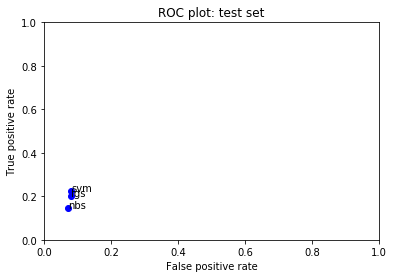

In [15]:
# fits = [svm_performance, lgs_performance, nbs_performance, rdg_performance, prc_performance]
fits = [svm_performance, lgs_performance, nbs_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

## Checking Results

In [16]:
amazon['svm_predictions'] = svm.predict(X)
amazon['nbs_predictions'] = nbs.predict(X)

In [17]:
# take all rows where at least one tagged as true
someoneSaysTrue = amazon[amazon.helpful | amazon.svm_predictions | amazon.nbs_predictions]

In [22]:
helpful_matrix = amazon.groupby(by=['helpful', 'nbs_predictions', 'svm_predictions'], as_index= False ).agg({'Id': "count"})
helpful_matrix = pd.pivot_table(helpful_matrix, values='Id', 
                       index=['nbs_predictions', 'svm_predictions'],
                       columns=['helpful'], 
                       aggfunc= np.sum,
                        margins = False)
helpful_matrix

helpful                          False  True 
nbs_predictions svm_predictions              
False           False            74142   4894
                True              4173    824
True            False             3318    315
                True              2659    675

In [25]:
# False Negatives -- problem: really missing the vast majority of positives

pd.set_option('display.max_colwidth', -1)
amazon[amazon.helpful & ~amazon.nbs_predictions].head(20)

,Unnamed: 0,Unnamed: 0.1,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpScore,helpful,svm_predictions,nbs_predictions
0,147718,546145,546146,B001AZ2UYI,AR4KQLKL8VJO4,W. Maxwell,14,15,5,1261785600,Heavenly Oil,"A chance introduction to Savini Tartufi White Truffle oil has become one our delightful pasta experiences. A light dribble of oil, with a sliver of goat cheese, and our pasta is complete.<br />Heavenly!<br /><br />This Savini oil has the aroma and the finish of a great flavored oil, with the sophisticated delicacy to warrant the price.<br /><br />Other domestic oils finish so harshly as to be distasteful and disagreeable. Having experienced this oil, we know what good food may be experienced,<br /><br />We discovered this oil upon the learning our previous oil was no longer being imported. It too was wonderful, but our need to have a replacement, a superior truffle oil, sent us searching, and we found this Italian export through Amazon.com.<br /><br />For those enjoying truffles, I heartily recommend this oil for eggs, pasta, salads, where ever a premium oil would add a delicate note to the flavors of the dish.",0.933333,True,False,False
1,223621,478031,478032,B000WZZVI4,A2TIETTFZ3YYAU,"Donna Toy ""Foot comfort expert""",10,10,5,1201478400,"Great product, but don't buy it here",I have no complaints with the product. But don't buy it here. The shipping was double the cost of the product.,1.000000,True,False,False
16,15184,448638,448639,B004ZWRA6G,A11K70GWSB7A5Z,Nicole Del Sesto,14,14,4,1308700800,Yep. It's gum all right.,"I am a Trident Original gal. Have been since my youth. Oh sure, I strayed into Extra territory, and who can forget the ""Bubble Yum"" years? (Red Dye Number 2 anyone? I know, you are too young. Whatever.)<br /><br />I always returned to my Trident Original. It tastes good, the flavor lasts, it's the right size. But this is not Trident Original. This is fancy pants Trident Vitality ""Awaken.""<br /><br />Trident lets you know it's fancy by excessively packaging it. It's a lot of paper and plastic for 9 pieces of gum, so I dropped it a star for that.<br /><br />The gum is nicely flavored. I do like the texture aspect when biting into a crunchy outer coating, and getting into the soft center. The flavor lasts a long, long time. (I'm pretty sure that's another gum's motto - Hubba Bubba as it turns out.)<br /><br />I chewed for 45 minutes. At first it's a pretty soft chew, but the gum firms up as time goes on. By the time I was ready to spit it out, the flavor was still there but my jaw was sore. I'm sure there's a joke in there somewhere.<br /><br />It's a nice gum, but nothing I would throw over my Trident Original for, and the packaging would give me pause anyway. Though, I will say that one benefit of the packaging means that it is impossible for the gum to fall out of the pack and get purse debris stuck to it, so that's a nice feature, but heck ... what's a little sand and tobacco stuck to your gum? It gives it character.",1.000000,True,False,False
32,280927,115673,115674,B000E23VXW,A2HRZ6AEVI3O23,"Jaime Lujan ""Jimmy Fiasco""",30,30,5,1268524800,Better Than Any Other Proteing Supplement,"I recently switched to protein supplements in an attempt to build lean muscle. Whey protein worked well but left me feeling bloated. I stumbled across this product while looking for an alternative, and it is fantastic! No bloating, no bog down, leaves me feeling fantastic. The taste leaves something to be desired, but what can you expect? It's raw, organic, and has no additives whatsoever, so protein is all you get. Mix it with a bit of almond milk, almond butter, and a banana, and it's the best thing ever!",1.000000,True,False,False
38,375116,117691,117692,B000HPBR8W,A12N6FQ84I2GZX,Stitcher,7,7,5,1255219200,A favorite,"This is my 5-yr-old daughter's favorite gluten free cracker. It has cheese powder on the outside of the cracker. She misses goldfish crackers and 

In [33]:
# False Positives -- still the problem is catching all the reviews without denominator at all

false_positives = amazon[~amazon.helpful & amazon.nbs_predictions]
((false_positives.helpScore > 0.8) & (false_positives.helpScore < .9)).sum()

104

In [30]:
(amazon.helpScore==1).sum()

29312

In [34]:
((amazon.helpScore > 0.8) & (amazon.helpScore < .9)).sum()

1343